In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.models import mobilenet_v2
import torchvision.models as models


# Define transforms for data augmentation and normalization
import torchvision.transforms as transforms

# Define the data transformations for the training set
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(size=224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomRotation(degrees=30),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.8, 1.2), shear=10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define the data transformations for the validation set
val_transforms = transforms.Compose([
    transforms.Resize(size=256),
    transforms.CenterCrop(size=224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create a dictionary for train and val transforms
data_transforms = {
    'train': train_transforms,
    'val': val_transforms
}


# Load the dataset
data_dir = '/content/drive/MyDrive/eg-currency'
image_datasets = {x: datasets.ImageFolder(f'{data_dir}/{x}', data_transforms[x]) for x in ['train', 'val']}
dataloaders = {x: DataLoader(image_datasets[x], batch_size=32, shuffle=True, num_workers=4) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

# Define the MobileNetV2 model
"""model = mobilenet_v2(pretrained=True)
num_features = model.classifier[1].in_features
model.classifier = nn.Sequential(
    nn.Dropout(0.2),
    nn.Linear(num_features, 11)
)"""
model = models.mobilenet_v3_large(pretrained=True)
num_ftrs = model.classifier[-1].in_features
model.classifier[-1] = nn.Linear(num_ftrs, 11)
model.load_state_dict(torch.load("/content/drive/MyDrive/cash.pt"))


# Set device for training
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    for phase in ['train', 'val']:
        running_loss = 0.0
        running_corrects = 0
        if phase == 'train':
            model.train()
        else:
            model.eval()
        for inputs, labels in dataloaders[phase]:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)
                if phase == 'train':
                    loss.backward()
                    optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
        epoch_loss = running_loss / len(image_datasets[phase])
        epoch_acc = running_corrects.double() / len(image_datasets[phase])
        print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')


train Loss: 0.7462 Acc: 0.7567
val Loss: 0.5461 Acc: 0.8457
train Loss: 0.5714 Acc: 0.8250
val Loss: 0.5431 Acc: 0.8580
train Loss: 0.4668 Acc: 0.8767
val Loss: 0.5477 Acc: 0.8272
train Loss: 0.4149 Acc: 0.8850
val Loss: 0.5196 Acc: 0.8519
train Loss: 0.3987 Acc: 0.8783
val Loss: 0.4613 Acc: 0.8889
train Loss: 0.4068 Acc: 0.8767
val Loss: 0.4662 Acc: 0.8765
train Loss: 0.3848 Acc: 0.8917
val Loss: 0.4334 Acc: 0.8642
train Loss: 0.3668 Acc: 0.8983
val Loss: 0.4657 Acc: 0.8704
train Loss: 0.4174 Acc: 0.8783
val Loss: 0.4014 Acc: 0.8889
train Loss: 0.3101 Acc: 0.9100
val Loss: 0.4069 Acc: 0.8951


In [ ]:
num_epochs = 10
for epoch in range(num_epochs):
    for phase in ['train', 'val']:
        running_loss = 0.0
        running_corrects = 0
        if phase == 'train':
            model.train()
        else:
            model.eval()
        for inputs, labels in dataloaders[phase]:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)
                if phase == 'train':
                    loss.backward()
                    optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
        epoch_loss = running_loss / len(image_datasets[phase])
        epoch_acc = running_corrects.double() / len(image_datasets[phase])
        print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')


train Loss: 0.2738 Acc: 0.9167
val Loss: 0.4465 Acc: 0.8580
train Loss: 0.2153 Acc: 0.9417
val Loss: 0.4618 Acc: 0.8580
train Loss: 0.2181 Acc: 0.9467
val Loss: 0.4864 Acc: 0.8642
train Loss: 0.2043 Acc: 0.9433
val Loss: 0.4516 Acc: 0.8580
train Loss: 0.2466 Acc: 0.9150
val Loss: 0.4687 Acc: 0.8765
train Loss: 0.2293 Acc: 0.9283
val Loss: 0.5034 Acc: 0.8457
train Loss: 0.2454 Acc: 0.9217
val Loss: 0.5072 Acc: 0.8519
train Loss: 0.2249 Acc: 0.9367
val Loss: 0.5009 Acc: 0.8457
train Loss: 0.2112 Acc: 0.9450
val Loss: 0.4495 Acc: 0.8642
train Loss: 0.1908 Acc: 0.9450
val Loss: 0.4901 Acc: 0.8457


Predicted class: 5 pounds


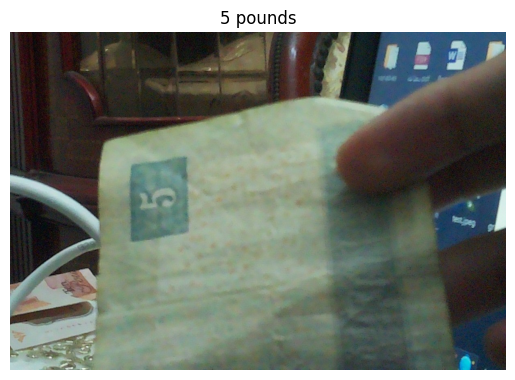

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
# Load the image
image_path = '/content/WhatsApp Image 2023-05-07 at 04.07.39.jpg'
image = Image.open(image_path)

# Apply the same transforms as used during training and validation
transform = data_transforms['val']
image = transform(image)

# Add a batch dimension to the image tensor
image = image.unsqueeze(0)

# Set the model to evaluation mode
model.eval()

# Pass the image through the model
with torch.no_grad():
    image = image.to(device)
    outputs = model(image)

# Get the predicted class index
_, predicted = torch.max(outputs.data, 1)
class_index = predicted.item()

# Print the predicted class label
print('Predicted class:', class_names[class_index])
plt.title(class_names[class_index])
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()


In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/cashmobres.pt')

In [ ]:
class_names

['0.5 coin',
 '0.5 pound',
 '1 pound',
 '1 pound coin',
 '10 pound',
 '10 pound new',
 '100 pounds',
 '20 pounds',
 '200 pounds',
 '5 pounds',
 '50 pounds']